In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data1 = pd.read_excel('sales_data.xlsx', sheet_name='daily_unit_sales', engine='openpyxl')
data2 = pd.read_excel('sales_data.xlsx', sheet_name='porduct_tbl', engine='openpyxl')

In [3]:
data = pd.merge(data1, data2, on="product_name")

In [4]:
data.head(5)

,store,store_region,product_name,day_date,units_sold,product_category,unit_price,unit_cost
0,store_1,BANTEN,product_1,2019-07-03,1847,Category_3,76,36
1,store_1,BANTEN,product_1,2019-07-04,1774,Category_3,76,36
2,store_1,BANTEN,product_1,2019-07-05,2909,Category_3,76,36
3,store_1,BANTEN,product_1,2019-07-06,1764,Category_3,76,36
4,store_1,BANTEN,product_1,2019-07-07,1917,Category_3,76,36


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
units_sold,54600.0,1602.938773,1752.815265,0.0,21.0,1000.0,2999.0,6689.0
unit_price,54600.0,78.066667,11.322451,61.0,68.0,76.0,90.0,97.0
unit_cost,54600.0,36.733333,10.667598,21.0,28.0,32.0,46.0,58.0


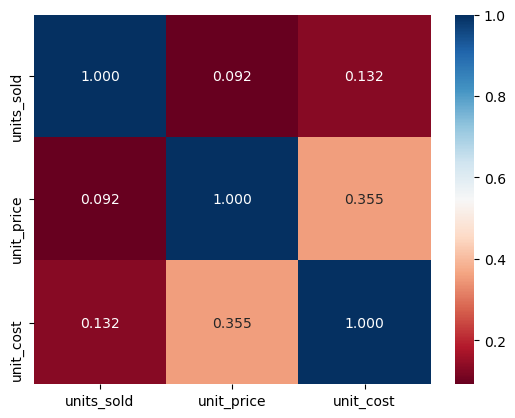

In [6]:
heatmap = sns.heatmap(data.corr(), cmap='RdBu', annot=True, fmt=".3f")

In [8]:
data.groupby('store_region').count()

,store,product_name,day_date,units_sold,product_category,unit_price,unit_cost
store_region,,,,,,,
BANTEN,10920,10920,10920,10920,10920,10920,10920
D.I. YOGYAKARTA,5460,5460,5460,5460,5460,5460,5460
DKI JAKARTA,10920,10920,10920,10920,10920,10920,10920
JAWA BARAT,5460,5460,5460,5460,5460,5460,5460
JAWA TENGAH,10920,10920,10920,10920,10920,10920,10920
JAWA TIMUR,10920,10920,10920,10920,10920,10920,10920


In [6]:
data['day_date'] = pd.to_datetime(data['day_date'])
data['month_num'] = data['day_date'].dt.month
data['month'] = data['day_date'].dt.month_name(locale='English')
data['year'] = data['day_date'].dt.year

data ['sales'] = data['units_sold']*data['unit_price']
data['profit'] = data['unit_price']-data['unit_cost']

In [7]:
data

,store,store_region,product_name,day_date,units_sold,product_category,unit_price,unit_cost,month_num,month,year,sales,profit
0,store_1,BANTEN,product_1,2019-07-03,1847,Category_3,76,36,7,July,2019,140372,40
1,store_1,BANTEN,product_1,2019-07-04,1774,Category_3,76,36,7,July,2019,134824,40
2,store_1,BANTEN,product_1,2019-07-05,2909,Category_3,76,36,7,July,2019,221084,40
3,store_1,BANTEN,product_1,2019-07-06,1764,Category_3,76,36,7,July,2019,134064,40
4,store_1,BANTEN,product_1,2019-07-07,1917,Category_3,76,36,7,July,2019,145692,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54595,store_10,JAWA TIMUR,product_15,2020-06-26,0,Category_4,90,32,6,June,2020,0,58
54596,store_10,JAWA TIMUR,product_15,2020-06-27,0,Category_4,90,32,6,June,2020,0,58
54597,store_10,JAWA TIMUR,product_15,2020-06-28,1114,Category_4,90,32,6,June,2020,100260,58
54598,store_10,JAWA TIMUR,product_15,2020-06-29,0,Category_4,90,32,6,June,2020,0,58


In [12]:
data.to_excel('salesdata_nri.xlsx', index=False)

In [16]:
s = data[data['year'] == 2020]
ss = data[data['year'] == 2019]

In [22]:
rep = {'month_num' : { 7 : 1, 8 : 2, 9 : 3, 10 : 4, 11 : 5, 12 : 6 }}

In [23]:
ss = ss.replace(rep)

In [24]:
s.rename(columns = {'sales':'sales_2020', 'profit':'profit_2020'}, inplace = True)
ss.rename(columns = {'sales':'sales_2019', 'profit':'profit_2019'}, inplace = True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [25]:
a = s[['month_num','sales_2020','profit_2020']]
b = ss[['month_num','sales_2019','profit_2019']]

In [26]:
b

,month_num,sales_2019,profit_2019
0,1,140372,40
1,1,134824,40
2,1,221084,40
3,1,134064,40
4,1,145692,40
...,...,...,...
54413,6,220410,58
54414,6,229590,58
54415,6,70650,58
54416,6,130500,58


In [27]:
c = pd.merge(a, b, on="month_num")

In [28]:
c

,month_num,sales_2020,profit_2020,sales_2019,profit_2019
0,1,290244,40,140372,40
1,1,290244,40,134824,40
2,1,290244,40,221084,40
3,1,290244,40,134064,40
4,1,290244,40,145692,40
...,...,...,...,...,...
124154995,6,0,58,220410,58
124154996,6,0,58,229590,58
124154997,6,0,58,70650,58
124154998,6,0,58,130500,58


In [34]:
ss.to_excel('sales2019.xlsx', index=False)
s.to_excel('sales2020.xlsx', index=False)

In [29]:
data

,store,store_region,product_name,day_date,units_sold,product_category,unit_price,unit_cost,month_num,month,year,sales,profit
0,store_1,BANTEN,product_1,2019-07-03,1847,Category_3,76,36,7,July,2019,140372,40
1,store_1,BANTEN,product_1,2019-07-04,1774,Category_3,76,36,7,July,2019,134824,40
2,store_1,BANTEN,product_1,2019-07-05,2909,Category_3,76,36,7,July,2019,221084,40
3,store_1,BANTEN,product_1,2019-07-06,1764,Category_3,76,36,7,July,2019,134064,40
4,store_1,BANTEN,product_1,2019-07-07,1917,Category_3,76,36,7,July,2019,145692,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54595,store_10,JAWA TIMUR,product_15,2020-06-26,0,Category_4,90,32,6,June,2020,0,58
54596,store_10,JAWA TIMUR,product_15,2020-06-27,0,Category_4,90,32,6,June,2020,0,58
54597,store_10,JAWA TIMUR,product_15,2020-06-28,1114,Category_4,90,32,6,June,2020,100260,58
54598,store_10,JAWA TIMUR,product_15,2020-06-29,0,Category_4,90,32,6,June,2020,0,58


In [31]:
data = data.replace(rep)

In [32]:
data

,store,store_region,product_name,day_date,units_sold,product_category,unit_price,unit_cost,month_num,month,year,sales,profit
0,store_1,BANTEN,product_1,2019-07-03,1847,Category_3,76,36,1,July,2019,140372,40
1,store_1,BANTEN,product_1,2019-07-04,1774,Category_3,76,36,1,July,2019,134824,40
2,store_1,BANTEN,product_1,2019-07-05,2909,Category_3,76,36,1,July,2019,221084,40
3,store_1,BANTEN,product_1,2019-07-06,1764,Category_3,76,36,1,July,2019,134064,40
4,store_1,BANTEN,product_1,2019-07-07,1917,Category_3,76,36,1,July,2019,145692,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54595,store_10,JAWA TIMUR,product_15,2020-06-26,0,Category_4,90,32,6,June,2020,0,58
54596,store_10,JAWA TIMUR,product_15,2020-06-27,0,Category_4,90,32,6,June,2020,0,58
54597,store_10,JAWA TIMUR,product_15,2020-06-28,1114,Category_4,90,32,6,June,2020,100260,58
54598,store_10,JAWA TIMUR,product_15,2020-06-29,0,Category_4,90,32,6,June,2020,0,58


In [33]:
data.to_excel('salesdata_nri.xlsx', index=False)